### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
import pandas as pd #library used for data analysis and data manipulation
import matplotlib.pyplot as plt #library used for data visualization and charts

In [2]:
ecommerce_data=pd.read_csv("/Users/jenny/Downloads/The E-commerce Dataset.csv") #pd.read_csv is used to import the .csv files from the system.
display(ecommerce_data) #display() shows the first and last 5 rows in the dataset along with the shape of the dataset.

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [3]:
ecommerce_data.head() #.head()gives the first 5 rows of dataset.

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [4]:
ecommerce_data.tail() #.tail()gives the last 5 rows of dataset.

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.0,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.0,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.0,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.0,27
19999,10808,10200,Boldly Displaying Sigourneys Cleavage ..,Galaxy Quest,4.0,0.0,M,Movies,29,67.0,11


In [5]:
#count of null values

count_of_null = ecommerce_data.isnull() #.isnull() used to find out the null values in the dataset with new variable called count_of_null
print(count_of_null.sum()) #there are missing values in "ratings", "helpfulness" and "gender" columns using .sum() the total count is 66

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [6]:
length_before = len(ecommerce_data) #the len() used to find out the number of rows in the dataframe(df)
print("Number of rows in the uncleaned dataset:", length_before) #there are 2000 rows in the dataframe by default

Number of rows in the uncleaned dataset: 20000


In [7]:
#.dropna() is used to drop the missing rows from the df and the after removing the missing values the cleaned df is formed into the new variable given.
ecommerce_data_cleaned = ecommerce_data.dropna() 

In [8]:
# The length after removing the null values is 19934 so 60 missing values have been removed and updated dataframe is now stored in 'ecommerce_data_cleaned'
print("Number of rows in the cleaned dataset:",len(ecommerce_data_cleaned))

Number of rows in the cleaned dataset: 19934


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [9]:
# Q2.1
# Total number of unique users
unique_users = ecommerce_data_cleaned['userId'].nunique()

# Total number of unique reviews
unique_reviews = ecommerce_data_cleaned['review'].nunique()

# Total number of unique items
unique_items = ecommerce_data_cleaned['item'].nunique()

# Total number of unique categories
unique_categories = ecommerce_data_cleaned['category'].nunique()

# Print the results
print("Total unique users:", unique_users)
print("Total unique reviews:", unique_reviews)
print("Total unique items:", unique_items)
print("Total unique categories:", unique_categories)


Total unique users: 8565
Total unique reviews: 19460
Total unique items: 89
Total unique categories: 9


In [10]:
# Q2.2 Descriptive statistics for rating records
rating_stats=ecommerce_data_cleaned["rating"].describe()
print(rating_stats)

count    19934.000000
mean         3.701415
std          1.404546
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [11]:
# Q2.3 Descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
items_rated_bygenders=ecommerce_data_cleaned.groupby("item")["gender"].count()
stats_for_itemsbygenders=items_rated_bygenders.describe()
print(stats_for_itemsbygenders)

count     89.000000
mean     223.977528
std      116.608511
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      941.000000
Name: gender, dtype: float64


In [12]:
# Q2.4 Descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items
ratings_per_item=ecommerce_data_cleaned.groupby("item")["rating"].count()
statistics_per_item = ratings_per_item.describe()
print(statistics_per_item)

count     89.000000
mean     223.977528
std      116.608511
min      139.000000
25%      162.000000
50%      187.000000
75%      245.000000
max      941.000000
Name: rating, dtype: float64


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

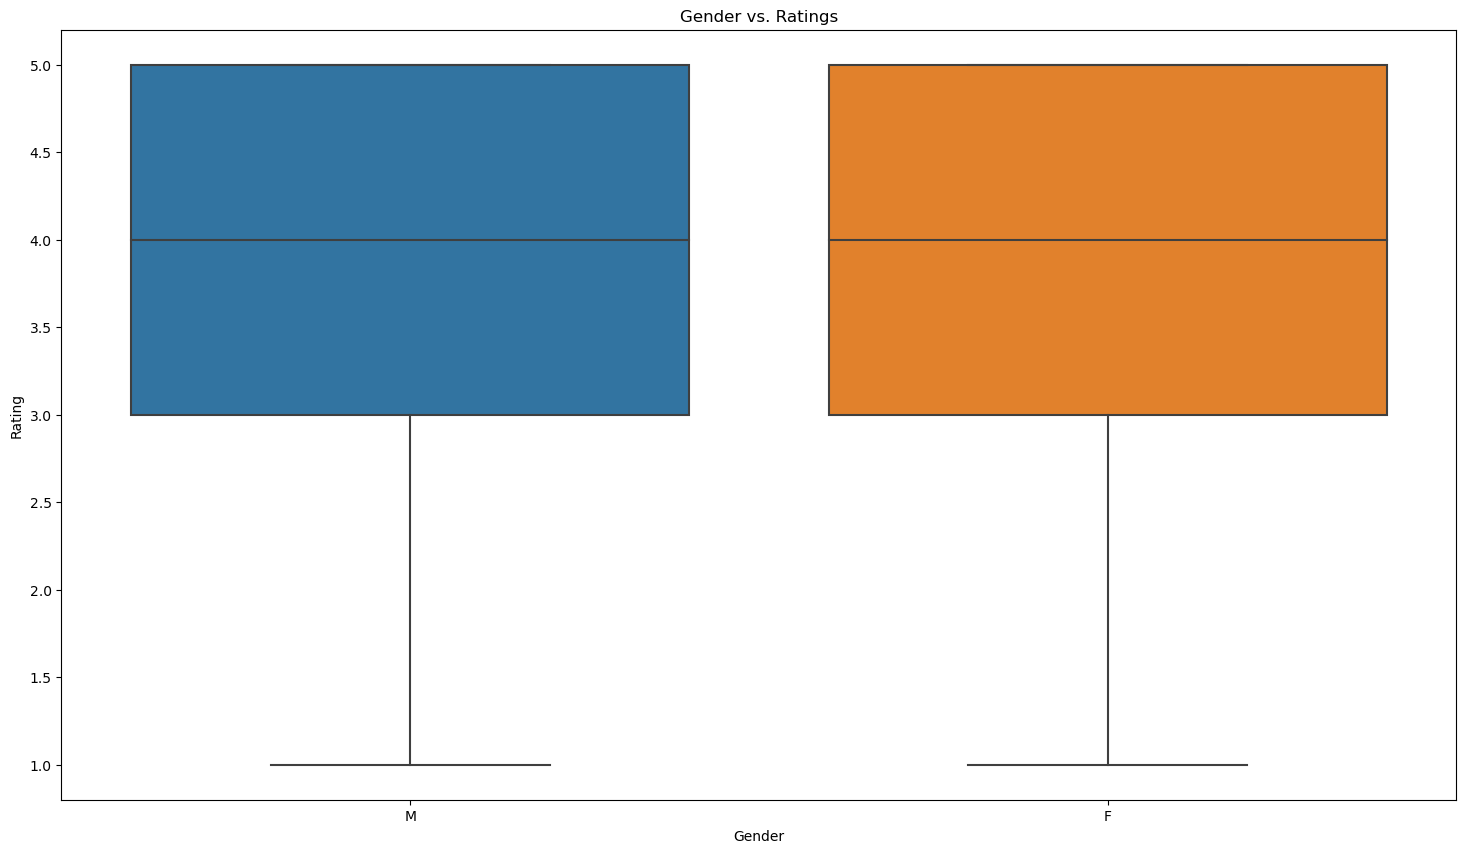

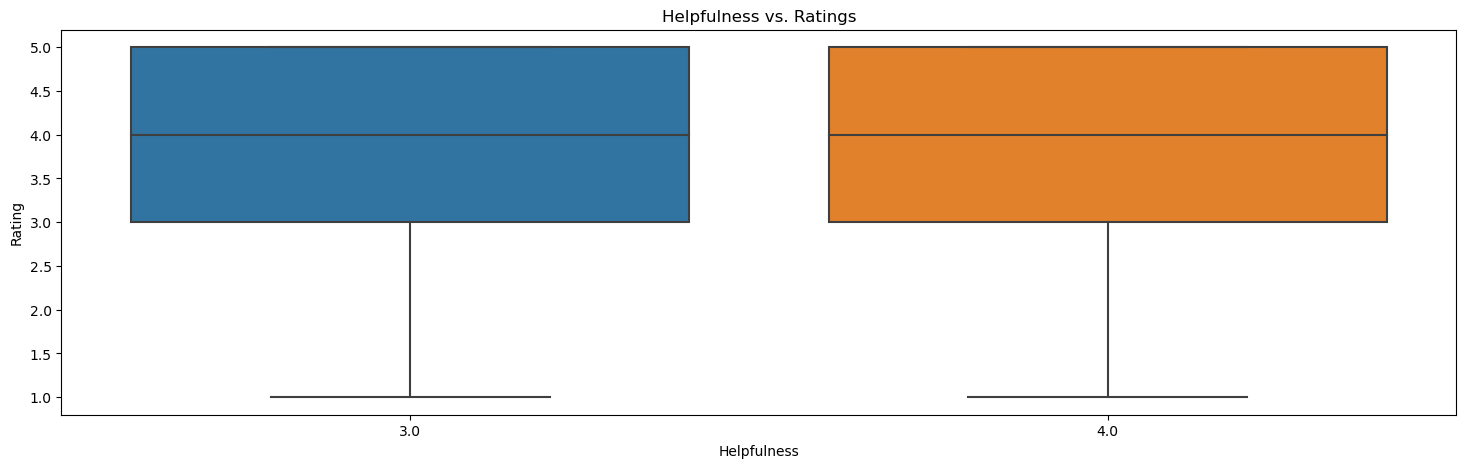

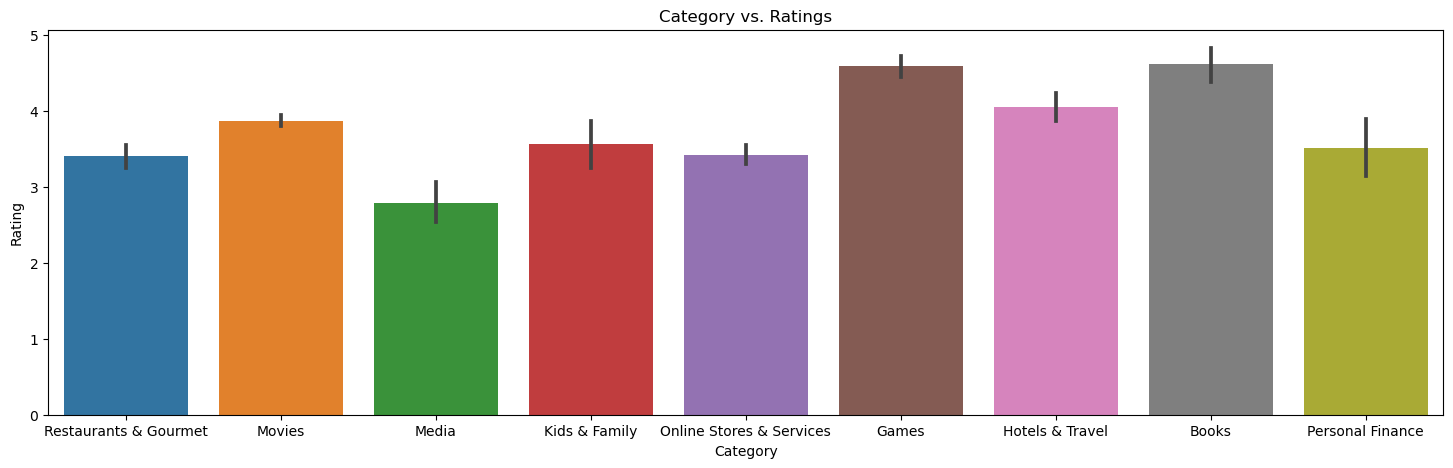

In [18]:
# Q3.3
import seaborn as sns
import matplotlib.pyplot as plt

# Gender vs. Ratings
plt.figure(figsize=(18, 10))
sns.boxplot(x='gender', y='rating', data=ecommerce_data_cleaned)
plt.title('Gender vs. Ratings')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

# Helpfulness vs. Ratings
plt.figure(figsize=(18, 5))
sns.boxplot(x='helpfulness', y='rating', data=ecommerce_data_cleaned)
plt.title('Helpfulness vs. Ratings')
plt.xlabel('Helpfulness')
plt.ylabel('Rating')
plt.show()

# Category vs. Ratings
plt.figure(figsize=(18, 5))
sns.barplot(x='category', y='rating', data=ecommerce_data_cleaned)
plt.title('Category vs. Ratings')
plt.xlabel('Category')
plt.ylabel('Rating')

plt.show()


## Summary :

The analysis of ecommerce data provides a comprehensive overview of user engagement and satisfaction within various categories and demographic segments. Through graphical representations such as box plots and bar charts, several key insights have emerged.

Firstly, gender-based analysis demonstrates a balanced distribution of ratings, suggesting an equitable user experience across genders. Similarly, the correlation between helpfulness and ratings reaffirms this trend, indicating consistent levels of user satisfaction irrespective of gender.

Categorically, books and games emerge as top performers, boasting the highest average ratings, while media lags behind with the lowest ratings. This discrepancy underscores potential areas for improvement within the media category and highlights the need for targeted interventions to enhance user satisfaction.

Interestingly, the observation that certain categories, such as restaurants and gourmet, alongside online stores & services, exhibit identical average ratings prompts further investigation into the underlying factors contributing to this phenomenon. Understanding the drivers behind such consistency can offer valuable insights for optimizing user experiences across various domains.

In summation, the ecommerce data analysis provides valuable insights into user behavior and preferences, guiding stakeholders in optimizing their platforms and services to enhance user satisfaction and engagement. By leveraging these insights, businesses can tailor their strategies to better meet the evolving needs and expectations of their customers, ultimately fostering sustainable growth and success in the competitive ecommerce landscape.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [14]:
# Reviews of which the helpfulness is no more than 2
outlier_reviews_rule1 = ecommerce_data_cleaned[ecommerce_data_cleaned['helpfulness'] <= 2]

# Users who rate less than 7 items
user_rating_counts = ecommerce_data_cleaned['userId'].value_counts()
outlier_users_rule2 = user_rating_counts[user_rating_counts < 7].index
#user_rating_counts = (ecommerce_data_cleaned['userId'].value_counts() < 7)


# Items that receive less than 11 ratings
item_rating_counts = ecommerce_data_cleaned['item_id'].value_counts()
outlier_items_rule3 = item_rating_counts[item_rating_counts < 11].index
#item_rating_counts = (ecommerce_data_cleaned['item_id'].value_counts() < 11)

# Combine all outlier records
outlier_reviews = outlier_reviews_rule1
outlier_users = ecommerce_data_cleaned[ecommerce_data_cleaned['userId'].isin(outlier_users_rule2)]
outlier_items = ecommerce_data_cleaned[ecommerce_data_cleaned['item_id'].isin(outlier_items_rule3)]

# Print the number of outlier records for each rule
print("Number of outlier reviews (Rule 1):", len(outlier_reviews))
print("Number of outlier users (Rule 2):", len(outlier_users))
print("Number of outlier items (Rule 3):", len(outlier_items))
print("Length of the cleaned data:", len(ecommerce_data_cleaned))

Number of outlier reviews (Rule 1): 6276
Number of outlier users (Rule 2): 14870
Number of outlier items (Rule 3): 0
Length of the cleaned data: 19934


In [15]:
# Rule 1: Reviews of which the helpfulness is no more than 2
outlier_reviews_rule1_indices = ecommerce_data_cleaned[ecommerce_data_cleaned['helpfulness'] <= 2].index
ecommerce_data_cleaned.drop(outlier_reviews_rule1_indices, inplace=True)

# Rule 2: Users who rate less than 7 items
user_rating_counts = ecommerce_data_cleaned['userId'].value_counts()
outlier_users_rule2_indices = user_rating_counts[user_rating_counts < 7].index
ecommerce_data_cleaned = ecommerce_data_cleaned[~ecommerce_data_cleaned['userId'].isin(outlier_users_rule2_indices)]

# Rule 3: Items that receive less than 11 ratings
item_rating_counts = ecommerce_data_cleaned['item_id'].value_counts()
outlier_items_rule3_indices = item_rating_counts[item_rating_counts < 11].index
ecommerce_data_cleaned = ecommerce_data_cleaned[~ecommerce_data_cleaned['item_id'].isin(outlier_items_rule3_indices)]

# Print the length of the cleaned data
print("Length of the cleaned data:", len(ecommerce_data_cleaned))


Length of the cleaned data: 2696


/var/folders/m1/r9pp18xx61vbjydg2mrssxqh0000gn/T/ipykernel_833/2465948629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_data_cleaned.drop(outlier_reviews_rule1_indices, inplace=True)
